In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [2]:
svm_model = SVC(probability=True)

In [3]:
df = pd.read_csv(r'C:\Users\DY\Documents\GitHub\UFCproject\df_ufc_masters_w_reversed.csv')

In [4]:
feature_names = [
    'B_age',
    'R_age',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms'
]


array([[<Axes: title={'center': 'B_age'}>,
        <Axes: title={'center': 'R_age'}>,
        <Axes: title={'center': 'B_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'B_avg_SIG_STR_pct'}>],
       [<Axes: title={'center': 'B_avg_SUB_ATT'}>,
        <Axes: title={'center': 'B_avg_TD_landed'}>,
        <Axes: title={'center': 'B_avg_TD_pct'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_landed'}>],
       [<Axes: title={'center': 'R_avg_SIG_STR_pct'}>,
        <Axes: title={'center': 'R_avg_SUB_ATT'}>,
        <Axes: title={'center': 'R_avg_TD_landed'}>,
        <Axes: title={'center': 'R_avg_TD_pct'}>],
       [<Axes: title={'center': 'B_Height_cms'}>,
        <Axes: title={'center': 'B_Reach_cms'}>,
        <Axes: title={'center': 'R_Height_cms'}>,
        <Axes: title={'center': 'R_Reach_cms'}>]], dtype=object)

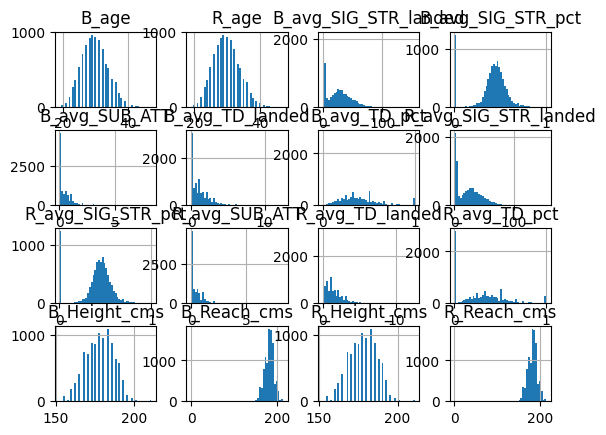

In [5]:
df[feature_names].hist(bins=50)

In [6]:
# List of columns to apply np.log
columns_to_log = ['B_avg_SIG_STR_landed', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 
                  'R_avg_SIG_STR_landed', 'R_avg_SUB_ATT', 'R_avg_TD_landed']

# Applying np.log to each column in the list
for col in columns_to_log:
    # Adding a small constant to avoid log(0) which is undefined
    df[col] = np.log(df[col] + 1e-5)

array([[<Axes: title={'center': 'B_avg_SIG_STR_landed'}>,
        <Axes: title={'center': 'B_avg_SUB_ATT'}>],
       [<Axes: title={'center': 'B_avg_TD_landed'}>,
        <Axes: title={'center': 'R_avg_SIG_STR_landed'}>],
       [<Axes: title={'center': 'R_avg_SUB_ATT'}>,
        <Axes: title={'center': 'R_avg_TD_landed'}>]], dtype=object)

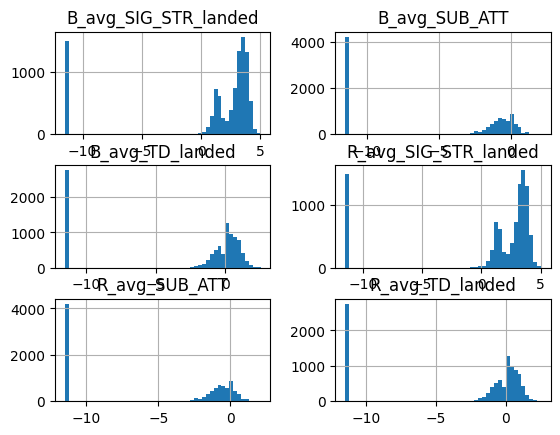

In [7]:
df[columns_to_log].hist(bins=50)

In [8]:
features_std_sc = [
    'R_age',
    'B_age',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct',
    'B_Height_cms',
    'B_Reach_cms',
    'R_Height_cms',
    'R_Reach_cms'
]

In [9]:
df[features_std_sc].isna().sum()

R_age                   0
B_age                   0
B_avg_SIG_STR_landed    0
B_avg_SIG_STR_pct       0
B_avg_SUB_ATT           0
B_avg_TD_landed         0
B_avg_TD_pct            0
R_avg_SIG_STR_landed    0
R_avg_SIG_STR_pct       0
R_avg_SUB_ATT           0
R_avg_TD_landed         0
R_avg_TD_pct            0
B_Height_cms            0
B_Reach_cms             0
R_Height_cms            0
R_Reach_cms             0
dtype: int64

In [10]:
sc = StandardScaler()
sc.fit(df[features_std_sc])
df[['B_age',
    'R_age',
    'B_avg_SIG_STR_landed_ss',
    'B_avg_SIG_STR_pct_ss',
    'B_avg_SUB_ATT_ss',
    'B_avg_TD_landed_ss',
    'B_avg_TD_pct_ss',
    'R_avg_SIG_STR_landed_ss',
    'R_avg_SIG_STR_pct_ss',
    'R_avg_SUB_ATT_ss',
    'R_avg_TD_landed_ss',
    'R_avg_TD_pct_ss',
    'B_Height_cms_ss',
    'B_Reach_cms_ss',
    'R_Height_cms_ss',
    'R_Reach_cms_ss']] = sc.transform(df[features_std_sc])

In [11]:
y = df['Winner'].apply(lambda x: 1 if x == 'Red' else 0)  # Encode 'Red' as 1 and 'Blue' as 0

X = df[['B_age',
        'R_age',
        'B_avg_SIG_STR_landed_ss',
        'B_avg_SIG_STR_pct_ss',
        'B_avg_SUB_ATT_ss',
        'B_avg_TD_landed_ss',
        'B_avg_TD_pct_ss',
        'R_avg_SIG_STR_landed_ss',
        'R_avg_SIG_STR_pct_ss',
        'R_avg_SUB_ATT_ss',
        'R_avg_TD_landed_ss',
        'R_avg_TD_pct_ss',
        'B_Height_cms_ss',
        'B_Reach_cms_ss',
        'R_Height_cms_ss',
        'R_Reach_cms_ss']]

In [12]:
X.isna().sum()

B_age                      0
R_age                      0
B_avg_SIG_STR_landed_ss    0
B_avg_SIG_STR_pct_ss       0
B_avg_SUB_ATT_ss           0
B_avg_TD_landed_ss         0
B_avg_TD_pct_ss            0
R_avg_SIG_STR_landed_ss    0
R_avg_SIG_STR_pct_ss       0
R_avg_SUB_ATT_ss           0
R_avg_TD_landed_ss         0
R_avg_TD_pct_ss            0
B_Height_cms_ss            0
B_Reach_cms_ss             0
R_Height_cms_ss            0
R_Reach_cms_ss             0
dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define the parameter grid: 
#param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [15]:
# Create a GridSearchCV object with an SVM model
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

In [16]:
# Fit the grid search to the data
#grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [17]:
#print("Best Parameters: ", grid.best_params_)

Best Parameters:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [38]:
svm_model = SVC(kernel='linear', C=1, gamma=0.01, probability=True)

In [39]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=0.01, kernel='linear', probability=True)

In [40]:
svm_pred_proba = svm_model.predict_proba(X_test)
svm_pred_proba

array([[0.42149011, 0.57850989],
       [0.42835732, 0.57164268],
       [0.40155976, 0.59844024],
       ...,
       [0.45076096, 0.54923904],
       [0.41981133, 0.58018867],
       [0.3939114 , 0.6060886 ]])

In [41]:
svm_pred_percent = svm_pred_proba * 100
svm_pred_proba

array([[0.42149011, 0.57850989],
       [0.42835732, 0.57164268],
       [0.40155976, 0.59844024],
       ...,
       [0.45076096, 0.54923904],
       [0.41981133, 0.58018867],
       [0.3939114 , 0.6060886 ]])

In [42]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

Train accuracy: 0.5795657726692209
Train precsision: 0.5787432117920869
Train recall: 0.5736990515252499


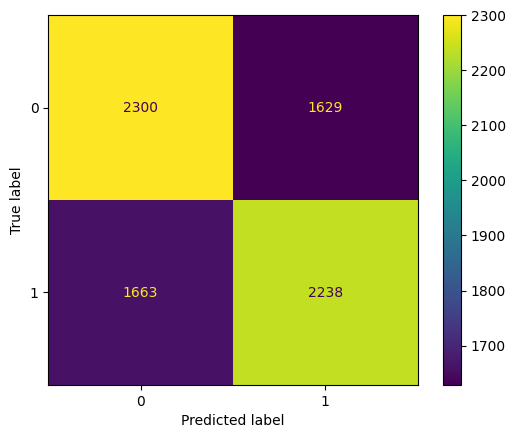

In [43]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5760980592441267
Test precsision: 0.5853403141361256
Test recall: 0.5629405840886204


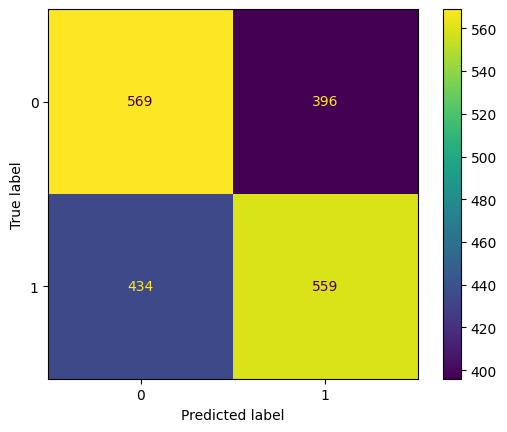

In [44]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')